In [29]:
import pandas as pd
import numpy as np
start_time = '2024-01-31 00:00:00'
end_time = '2024-02-28 00:00:00'

datetime_index = pd.date_range(start=start_time, end=end_time, freq='T')

data_values = np.zeros(len(datetime_index))  
# 8 am to 10 am
data_values[(datetime_index.hour >= 8) & (datetime_index.hour < 10)] = np.random.randint(3, 6, np.sum((datetime_index.hour >= 8) & (datetime_index.hour < 10)))

# 3 pm to 5 pm
data_values[(datetime_index.hour >= 15) & (datetime_index.hour < 17)] = np.random.randint(3, 6, np.sum((datetime_index.hour >= 15) & (datetime_index.hour < 17)))

# 5 pm to 8 pm
data_values[(datetime_index.hour >= 17) & (datetime_index.hour < 20)] = np.random.randint(3, 6, np.sum((datetime_index.hour >= 17) & (datetime_index.hour < 20)))

time_series_df = pd.DataFrame(data_values, index=datetime_index, columns=['visits'])

# Print the DataFrame
print(time_series_df)

#time_series_df.to_csv('time_series_data.csv')


                     visits
2024-01-31 00:00:00     0.0
2024-01-31 00:01:00     0.0
2024-01-31 00:02:00     0.0
2024-01-31 00:03:00     0.0
2024-01-31 00:04:00     0.0
...                     ...
2024-02-27 23:56:00     0.0
2024-02-27 23:57:00     0.0
2024-02-27 23:58:00     0.0
2024-02-27 23:59:00     0.0
2024-02-28 00:00:00     0.0

[40321 rows x 1 columns]


In [30]:
df = pd.DataFrame(time_series_df)

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

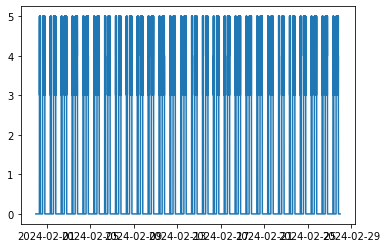

In [32]:
plt.plot(df.visits)

In [33]:
import seaborn as sns

In [34]:
dfresample["visits"] = df["visits"].resample('H').mean()

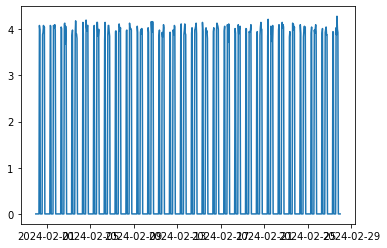

In [35]:
plt.plot(dfresample.visits)

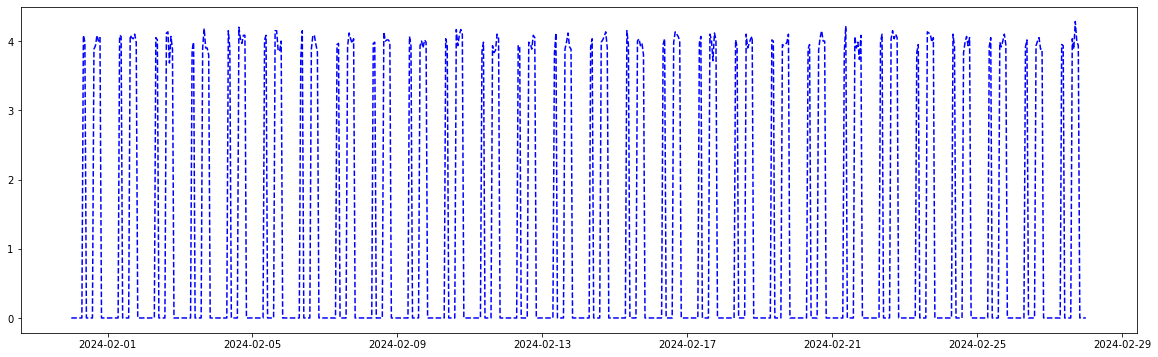

In [36]:
plt.figure(figsize=(20, 6))
plt.plot(dfresample['visits'], color='blue', linestyle='--', marker='', markersize=5, label='%cover')
plt.show()

In [37]:
start_time = '2024-01-31 00:00:00'
end_time = '2024-02-28 00:00:00'

datetime_index = pd.date_range(start=start_time, end=end_time, freq='T')

data_values = np.zeros(len(datetime_index))  

# 11 am to 2 pm
data_values[(datetime_index.hour >= 11) & (datetime_index.hour <= 2)] = np.random.randint(2, 4, np.sum((datetime_index.hour >= 11) & (datetime_index.hour <= 2)))

# 5 pm to 7 pm
data_values[(datetime_index.hour >= 20) & (datetime_index.hour <= 21)] = np.random.randint(3, 6, np.sum((datetime_index.hour >= 15) & (datetime_index.hour < 17)))
time_series_df1 = pd.DataFrame(data_values, index=datetime_index, columns=['visits'])
print(time_series_df1)
time_series_df.to_csv('time_series_data1.csv')
df1 = pd.DataFrame(time_series_df1)

                     visits
2024-01-31 00:00:00     0.0
2024-01-31 00:01:00     0.0
2024-01-31 00:02:00     0.0
2024-01-31 00:03:00     0.0
2024-01-31 00:04:00     0.0
...                     ...
2024-02-27 23:56:00     0.0
2024-02-27 23:57:00     0.0
2024-02-27 23:58:00     0.0
2024-02-27 23:59:00     0.0
2024-02-28 00:00:00     0.0

[40321 rows x 1 columns]


In [38]:
dfresample1["visits"] = df1["visits"].resample('H').mean()

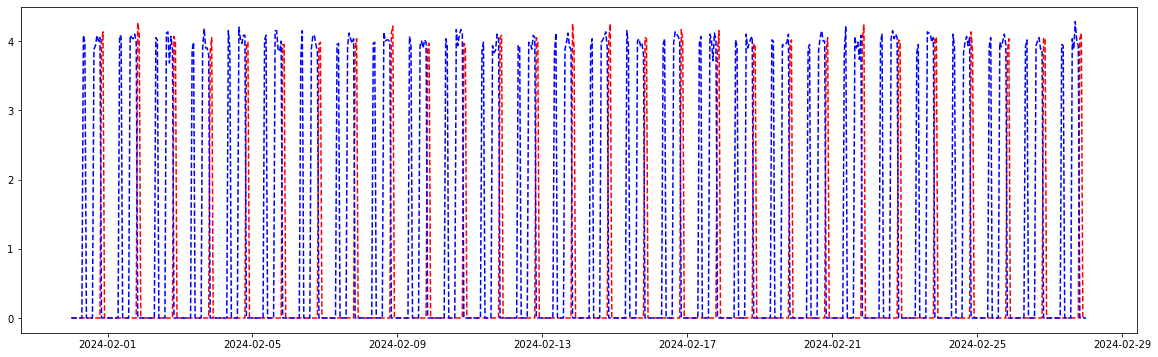

In [39]:
plt.figure(figsize=(20, 6))
plt.plot(dfresample1['visits'], color='red', linestyle='--', marker='', markersize=5, label='%cover')
plt.plot(dfresample['visits'], color='blue', linestyle='--', marker='', markersize=5, label='%cover')
plt.show()

In [72]:
# Define the start and end timestamps
start_time = '2024-02-28 00:00:00'
end_time = '2024-03-15 23:59:00'

# Generate datetime index at minute frequency for the specified time range
datetime_index = pd.date_range(start=start_time, end=end_time, freq='T')

# Create a DataFrame with the datetime index
time_series_df2 = pd.DataFrame(datetime_index, columns=['DATES'])

# Print the DataFrame
print(time_series_df2)

                    DATES
0     2024-02-28 00:00:00
1     2024-02-28 00:01:00
2     2024-02-28 00:02:00
3     2024-02-28 00:03:00
4     2024-02-28 00:04:00
...                   ...
24475 2024-03-15 23:55:00
24476 2024-03-15 23:56:00
24477 2024-03-15 23:57:00
24478 2024-03-15 23:58:00
24479 2024-03-15 23:59:00

[24480 rows x 1 columns]


In [73]:
df2 = time_series_df2

In [74]:
df2

,DATES
0,2024-02-28 00:00:00
1,2024-02-28 00:01:00
2,2024-02-28 00:02:00
3,2024-02-28 00:03:00
4,2024-02-28 00:04:00
...,...
24475,2024-03-15 23:55:00
24476,2024-03-15 23:56:00
24477,2024-03-15 23:57:00
24478,2024-03-15 23:58:00


In [75]:
def test_stationarity(df, var):
    df['rollMean'] = df[var].rolling(window=12).mean()    # rolling on 12 months
    df['rollStd'] = df[var].rolling(window=12).std()
    
    
    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(df[var],autolag='AIC')
    stats = pd.Series(adfTest[0:4],index =['Test Statistics','p-value','#lags used', 'number of observations used'])
    print(stats)
    
    for key, values in adfTest[4].items():    
        print('crticality',key,":",values)
    
    plt.plot(df[var])
    plt.plot(df.rollMean)
    plt.plot(df.rollStd)

Test Statistics                -25.043704
p-value                          0.000000
#lags used                      20.000000
number of observations used    652.000000
dtype: float64
crticality 1% : -3.440419374623044
crticality 5% : -2.865983079837035
crticality 10% : -2.5691361169972526


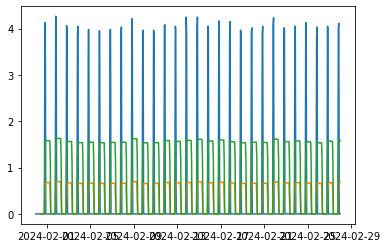

In [76]:
test_stationarity(dfresample1,"visits")

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

C:\Users\atharv\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


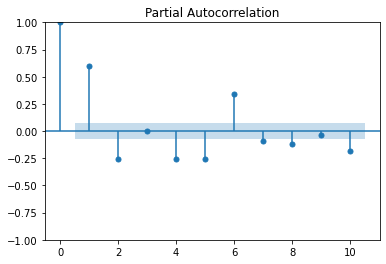

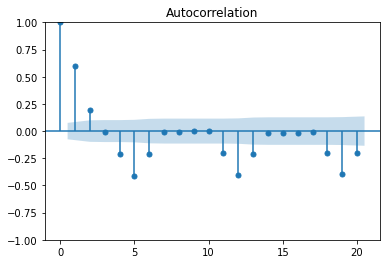

In [78]:
plot_pacf(dfresample['visits'],lags=10);
plot_acf(dfresample['visits'],lags=20);

In [91]:
df2.columns

Index(['DATES', 'sarimapred_visits'], dtype='object')

In [92]:
dfresample2 = df2.set_index(df2['DATES'])

In [98]:
modelsarimapred = SARIMAX(dfresample['visits'], order=(1,0,2),seasonal_order=(1,1,1,12))

In [99]:
modelsarimapredfit = modelsarimapred.fit()

In [100]:
predfuture = modelsarimapredfit.predict(start = dfresample2.index[0], end= dfresample2.index[-1])

In [101]:
dfresample2["sarimapred_visits"] = predfuture

In [112]:
start_time = '2024-02-28 00:00:00'
end_time = '2024-02-29 00:00:00'
datetime_index = pd.date_range(start=start_time, end=end_time, freq='T')

data_values = np.zeros(len(datetime_index))  # Initialize with zeros

# 8 AM to 10 AM
data_values[(datetime_index.hour >= 8) & (datetime_index.hour < 10)] = np.random.randint(0, 1, np.sum((datetime_index.hour >= 8) & (datetime_index.hour < 10)))

# 3 pm to 5 pm
data_values[(datetime_index.hour >= 15) & (datetime_index.hour < 17)] = np.random.randint(3, 6, np.sum((datetime_index.hour >= 15) & (datetime_index.hour < 17)))

# 5 pm to 8 pm
data_values[(datetime_index.hour >= 17) & (datetime_index.hour < 20)] = np.random.randint(3, 6, np.sum((datetime_index.hour >= 17) & (datetime_index.hour < 20)))
time_series_dftest = pd.DataFrame(data_values, index=datetime_index, columns=['visits'])
print(time_series_dftest)
time_series_df.to_csv('time_series_datatest.csv')
dftest = pd.DataFrame(time_series_dftest)

                     visits
2024-02-28 00:00:00     0.0
2024-02-28 00:01:00     0.0
2024-02-28 00:02:00     0.0
2024-02-28 00:03:00     0.0
2024-02-28 00:04:00     0.0
...                     ...
2024-02-28 23:56:00     0.0
2024-02-28 23:57:00     0.0
2024-02-28 23:58:00     0.0
2024-02-28 23:59:00     0.0
2024-02-29 00:00:00     0.0

[1441 rows x 1 columns]


### GREEN REPRESENTS PREDICTED, BLUE AND RED ARE TRENDS OF TWO SENSORS

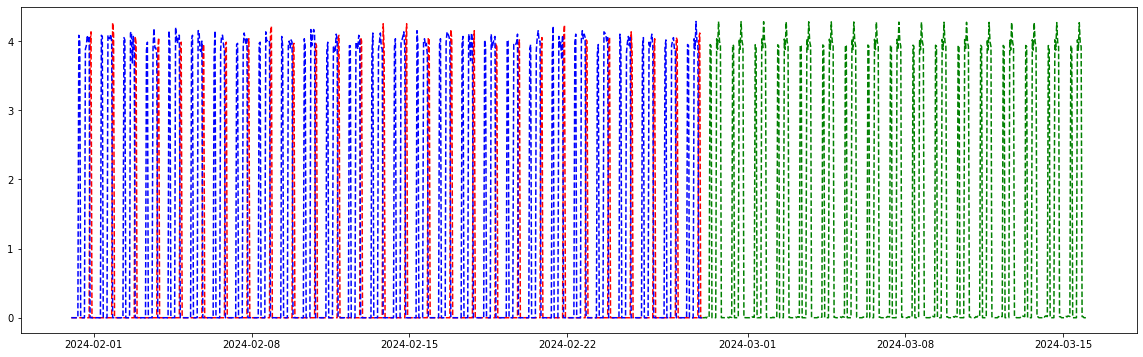

In [110]:
plt.figure(figsize=(20, 6))
plt.plot(dfresample1['visits'], color='red', linestyle='--', marker='', markersize=5, label='%cover')
plt.plot(dfresample['visits'], color='blue', linestyle='--', marker='', markersize=5, label='%cover')
plt.plot(dfresamplen["predicted_mean"], color='green', linestyle='--', marker='', markersize=5, label='%cover')
plt.show()

### YELLOW REPRESENTS ACTUAL TREND, THERE IS A ANOMALY

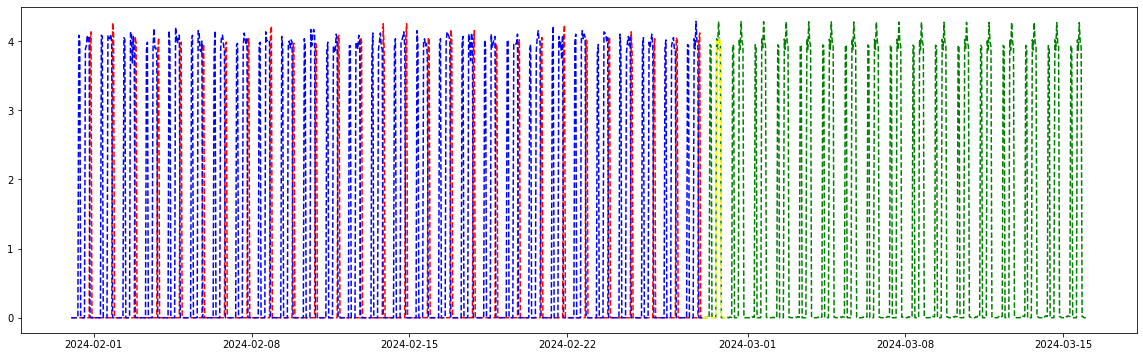

In [116]:
plt.figure(figsize=(20, 6))
plt.plot(dfresample1['visits'], color='red', linestyle='--', marker='', markersize=5, label='%cover')
plt.plot(dfresample['visits'], color='blue', linestyle='--', marker='', markersize=5, label='%cover')
plt.plot(dfresamplen["predicted_mean"], color='green', linestyle='--', marker='', markersize=5, label='%cover')
plt.plot(dftest["visits"].resample('H').mean(), color='yellow', linestyle='--', marker='', markersize=5, label='%cover')
plt.show()

In [137]:
for index, (row1, row2) in enumerate(zip(dfresamplen.itertuples(), dftest.itertuples()), 1):
    diff = abs(row1.predicted_mean - row2.visits)
    if diff > 4.281:
        print(f"DAVE IS INACTIVE (Difference of frequency of visits: {round(diff,1)} minutes )")

DAVE IS INACTIVE (Difference of frequency of visits: 4.3 minutes )
DAVE IS INACTIVE (Difference of frequency of visits: 4.3 minutes )


### THE ALERT IS SET OFF AS ANOMALY IS FOUND